# 🔹UFC Exploratory Data Analysis 

## 1. Import Libraries and Setup Environment

In [1]:
# Import necessary libraries
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the project root directory
project_root = '/home/mfourier/ufc-predictor'
file_path = f'{project_root}/data/processed/ufc_etl.csv'

## 2. Load Data

In [2]:
# Load the cleaned dataset
df = pd.read_csv(file_path)
print(f"Data loaded: {df.shape[0]} rows and {df.shape[1]} columns.")

Data loaded: 6541 rows and 89 columns.


## 3.  Initial Data Exploration

In [3]:
# View the first few rows of the training data
df.head()

,RedFighter,BlueFighter,RedOdds,BlueOdds,RedExpectedValue,BlueExpectedValue,Date,Location,Country,Winner,...,Finish,FinishRound,FinishRoundTime,TotalFightTimeSecs,RedDecOdds,BlueDecOdds,RSubOdds,BSubOdds,RKOOdds,BKOOdds
0,Colby Covington,Joaquin Buckley,205.0,-250.0,205.0000,40.0000,2024-12-14,"Tampa, Florida, USA",USA,Blue,...,KO/TKO,3.0,4:42,882.0,300.0,175.000000,1800.0,2000.000000,1100.0,150.000000
1,Cub Swanson,Billy Quarantillo,124.0,-148.0,124.0000,67.5676,2024-12-14,"Tampa, Florida, USA",USA,Red,...,KO/TKO,3.0,1:36,696.0,250.0,425.889565,1800.0,1102.388149,450.0,636.803475
2,Manel Kape,Bruno Silva,-395.0,310.0,25.3165,310.0000,2024-12-14,"Tampa, Florida, USA",USA,Red,...,KO/TKO,3.0,1:57,717.0,-105.0,550.000000,900.0,1800.000000,225.0,1100.000000
3,Vitor Petrino,Dustin Jacoby,-340.0,270.0,29.4118,270.0000,2024-12-14,"Tampa, Florida, USA",USA,Blue,...,KO/TKO,3.0,3:44,824.0,240.0,500.000000,550.0,3000.000000,110.0,800.000000
4,Adrian Yanez,Daniel Marcos,185.0,-225.0,185.0000,44.4444,2024-12-14,"Tampa, Florida, USA",USA,Blue,...,S-DEC,3.0,5:00,900.0,450.0,150.000000,2200.0,2200.000000,450.0,200.000000


In [4]:
# Descriptive statistics
df.describe()

,RedOdds,BlueOdds,RedExpectedValue,BlueExpectedValue,NumberOfRounds,BlueCurrentLoseStreak,BlueCurrentWinStreak,BlueDraws,BlueAvgSigStrLanded,BlueAvgSigStrPct,...,AvgTDDif,EmptyArena,FinishRound,TotalFightTimeSecs,RedDecOdds,BlueDecOdds,RSubOdds,BSubOdds,RKOOdds,BKOOdds
count,6541.000000,6541.000000,6541.000000,6541.000000,6541.000000,6541.000000,6541.000000,6541.000000,6541.000000,6541.00000,...,6541.000000,6541.000000,6541.000000,6541.000000,6541.000000,6541.000000,6541.000000,6541.000000,6541.000000,6541.000000
mean,-115.879157,59.928424,96.627469,165.142778,3.185446,0.501452,0.959028,0.023238,19.806700,0.45313,...,-0.171380,0.153114,2.424565,657.681534,307.993583,425.889565,885.041883,1102.388149,510.834646,636.803475
std,272.449173,248.731343,84.362707,135.339535,0.577357,0.794595,1.408093,0.156641,18.805901,0.10403,...,1.753972,0.316178,0.958311,342.632961,228.977678,296.720777,537.265281,598.641257,380.552949,414.078472
min,-2100.000000,-1200.000000,4.761900,8.333300,3.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,-11.000000,0.000000,1.000000,5.000000,-440.000000,-200.000000,-370.000000,-1250.000000,-550.000000,-400.000000
25%,-250.000000,-145.000000,40.000000,68.965500,3.000000,0.000000,0.000000,0.000000,4.210000,0.41000,...,-1.010000,0.000000,2.000000,371.000000,180.000000,245.000000,500.000000,700.000000,275.000000,360.000000
50%,-145.000000,125.000000,68.965500,135.000000,3.000000,0.000000,0.000000,0.000000,18.625000,0.45313,...,0.000000,0.000000,3.000000,733.000000,300.000000,415.000000,885.041883,1102.388149,510.834646,636.803475
75%,125.000000,210.000000,125.000000,210.000000,3.000000,1.000000,1.000000,0.000000,29.300000,0.50300,...,0.700000,0.153114,3.000000,900.000000,360.000000,500.000000,1100.000000,1345.000000,600.000000,750.000000
max,775.000000,1300.000000,775.000000,1300.000000,5.000000,6.000000,12.000000,2.000000,154.000000,1.00000,...,10.860000,1.000000,5.000000,1500.000000,2400.000000,3000.000000,4665.000000,5000.000000,4000.000000,4000.000000


In [5]:
# DataFrame information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6541 entries, 0 to 6540
Data columns (total 89 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   RedFighter                   6541 non-null   object 
 1   BlueFighter                  6541 non-null   object 
 2   RedOdds                      6541 non-null   float64
 3   BlueOdds                     6541 non-null   float64
 4   RedExpectedValue             6541 non-null   float64
 5   BlueExpectedValue            6541 non-null   float64
 6   Date                         6541 non-null   object 
 7   Location                     6541 non-null   object 
 8   Country                      6541 non-null   object 
 9   Winner                       6541 non-null   object 
 10  TitleBout                    6541 non-null   bool   
 11  WeightClass                  6541 non-null   object 
 12  Gender                       6541 non-null   object 
 13  NumberOfRounds    

## 4. Target Variable Exploration

### Visualizing the Distribution of the Target Variable

In [6]:
# Distribution of the target variable (assuming it's binary)
sns.countplot(x=y_train)
plt.title("Distribution of Target Variable")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

NameError: name 'y_train' is not defined

## 5. Univariate Analysis of Features (X)

In [7]:
# Histograms of the predictor features
X_train.hist(bins=15, figsize=(15, 10))
plt.suptitle("Distribution of Predictor Features")
plt.show()

NameError: name 'X_train' is not defined

## 6. Correlation Between Features

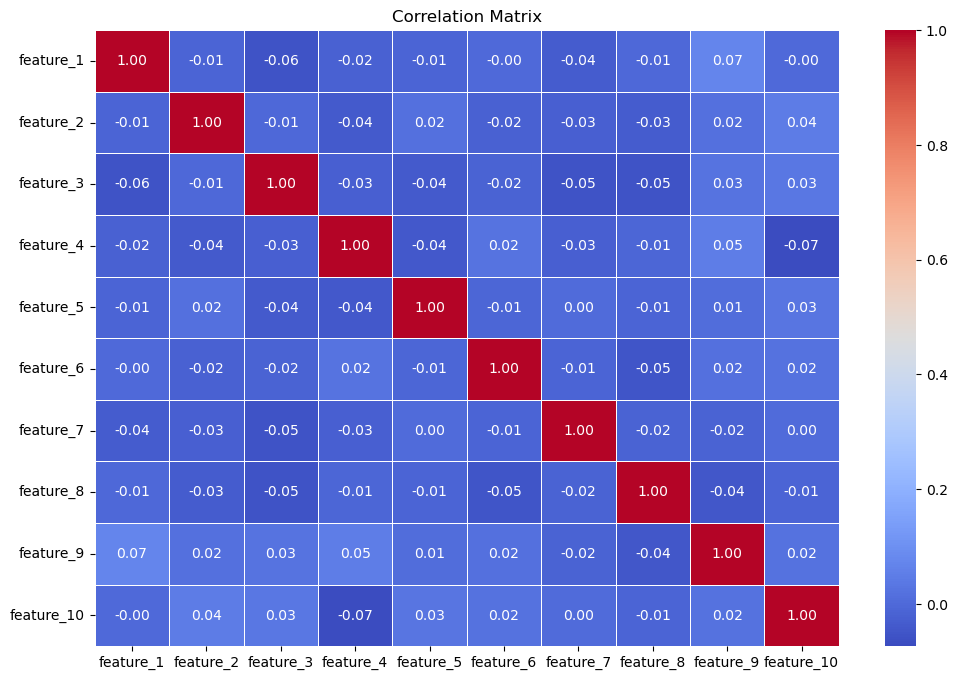

In [11]:
# Correlation between features
correlation_matrix = X_train.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


## 7. Relationships Between Features and Target Variable

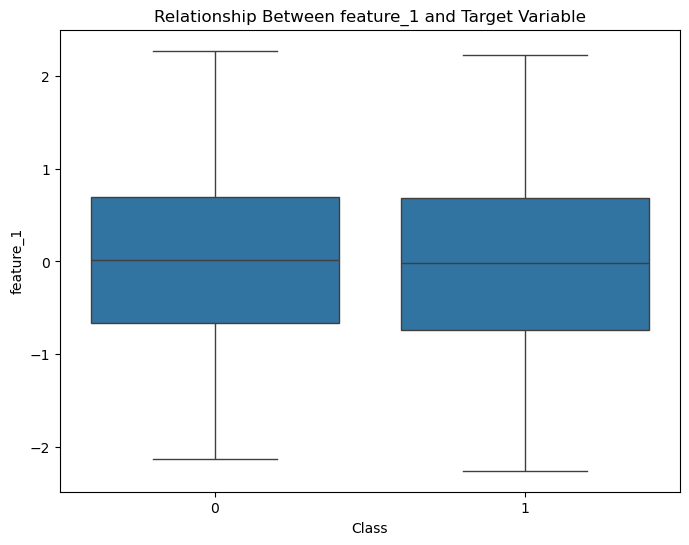

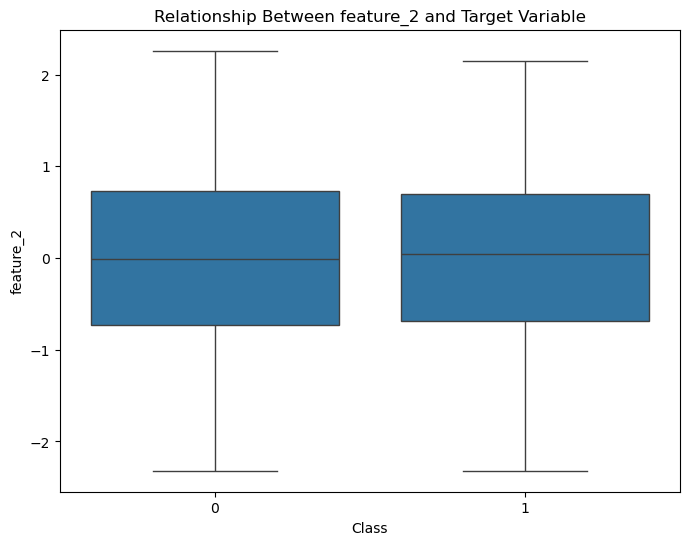

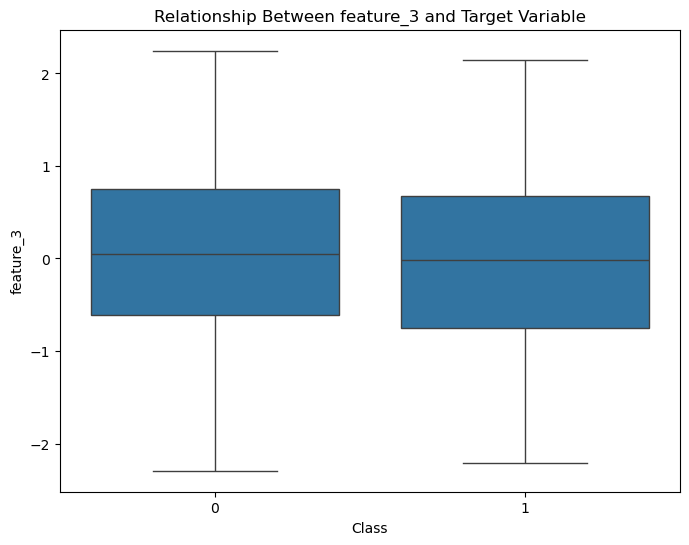

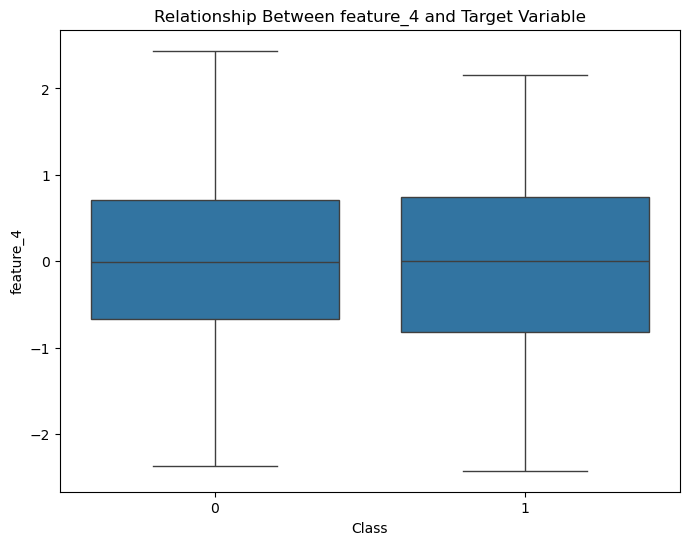

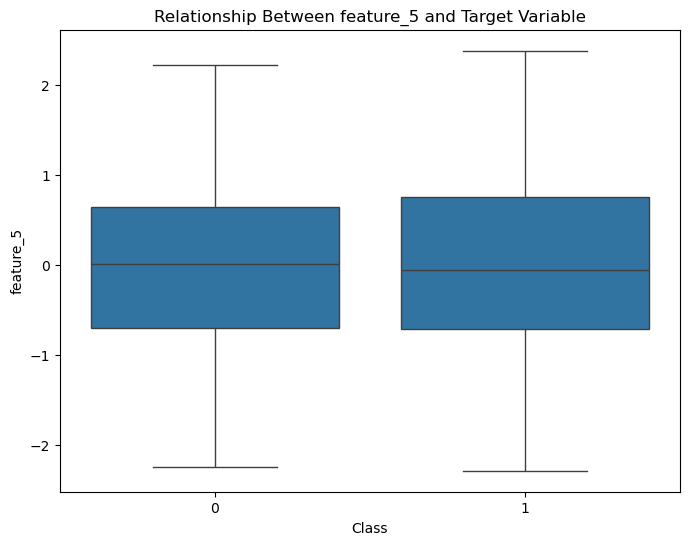

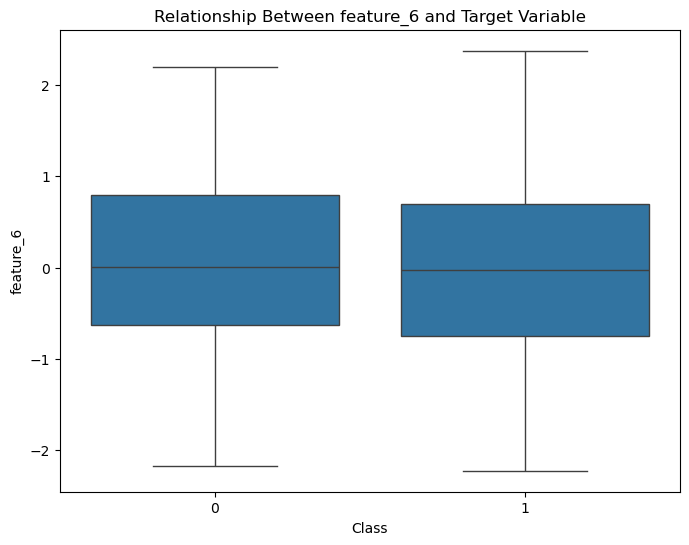

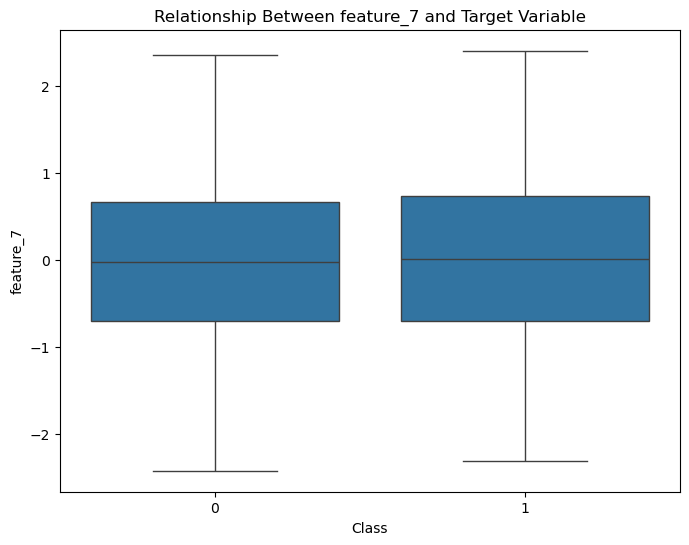

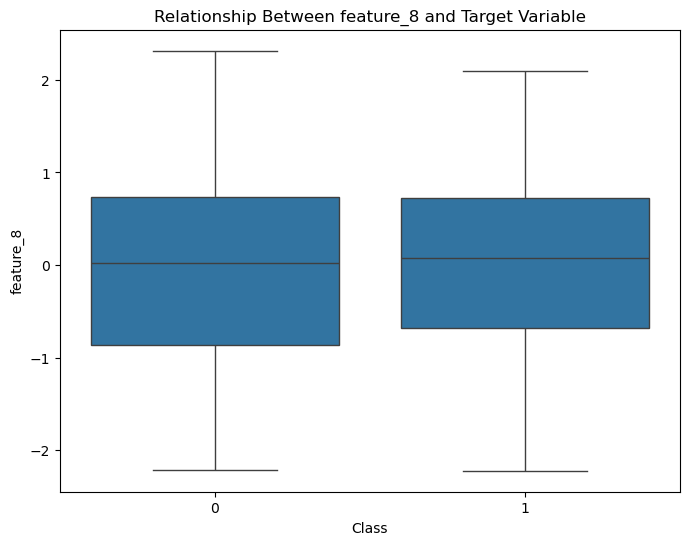

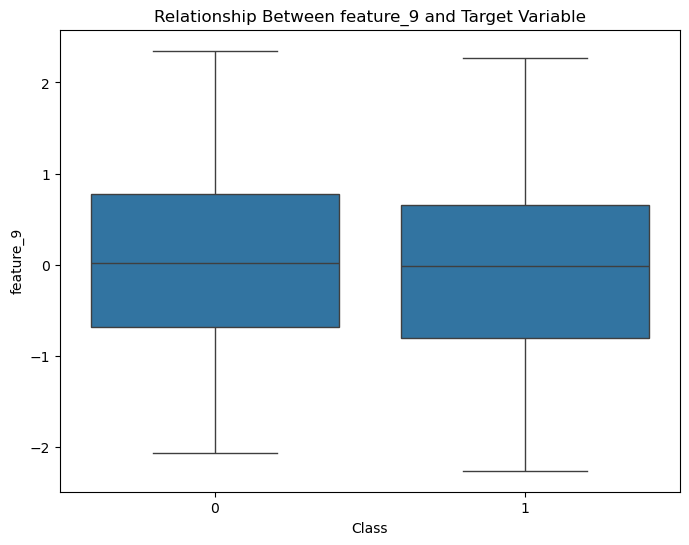

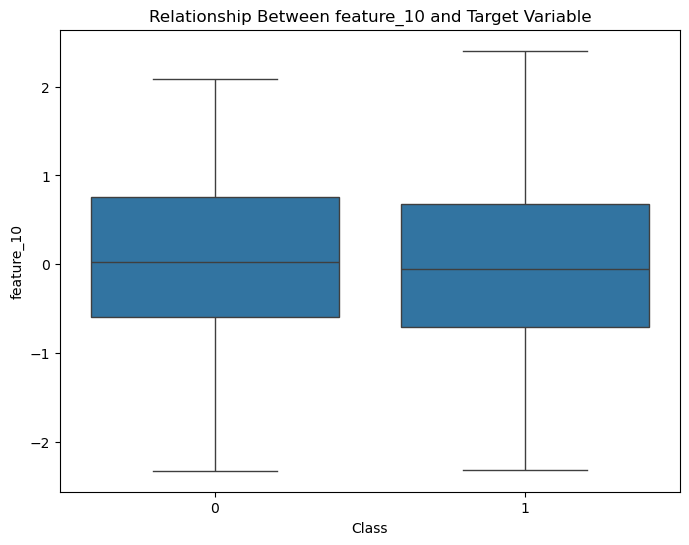

In [12]:
# Relationship between features and target variable
for col in X_train.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=y_train, y=X_train[col])
    plt.title(f"Relationship Between {col} and Target Variable")
    plt.xlabel("Class")
    plt.ylabel(col)
    plt.show()

## 8. Outliers Analysis

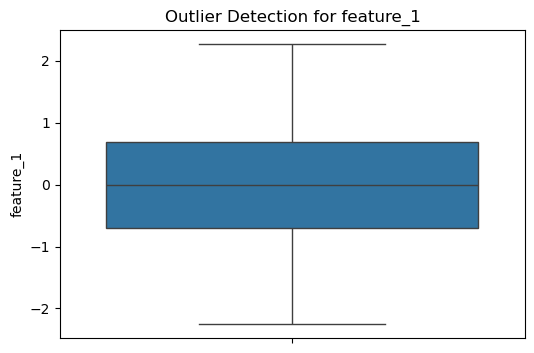

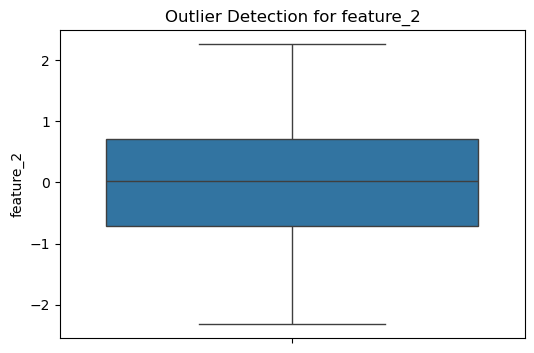

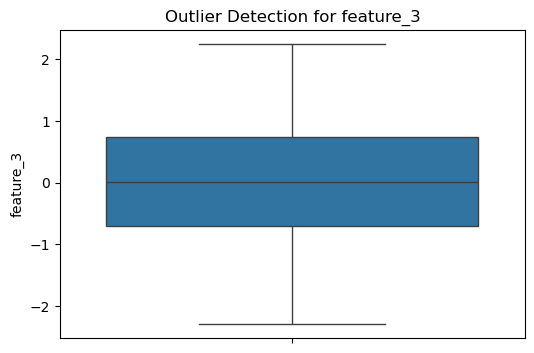

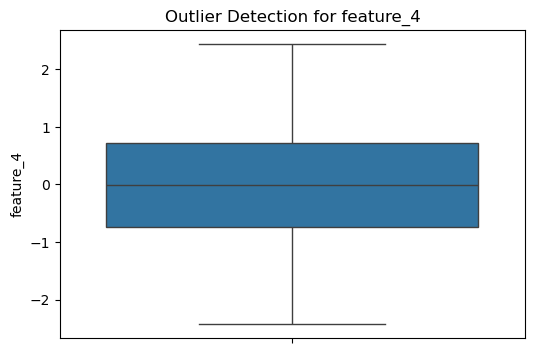

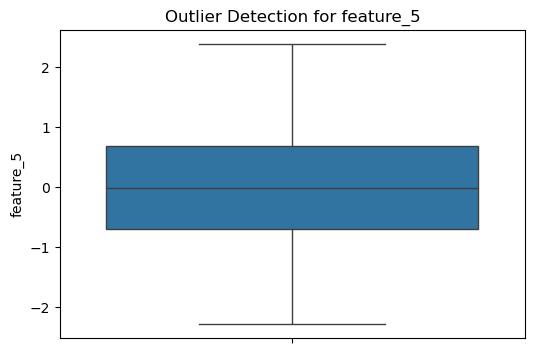

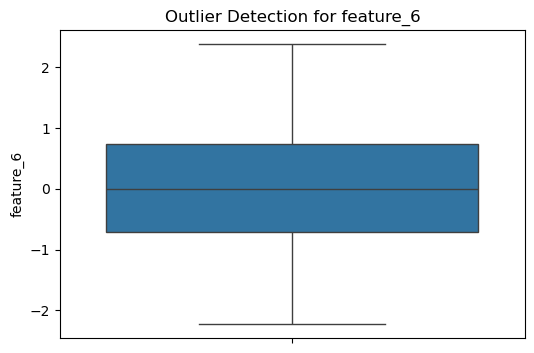

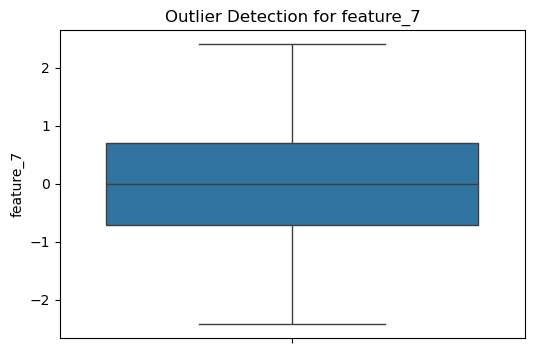

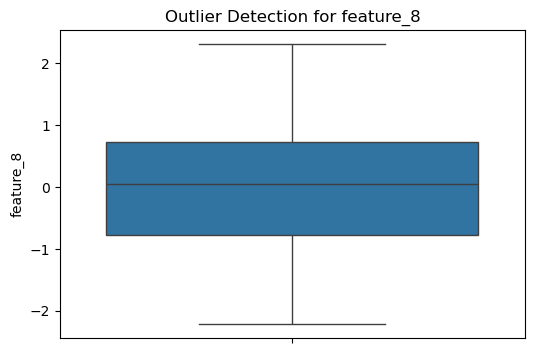

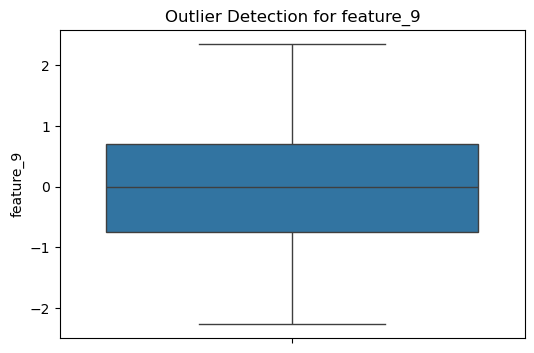

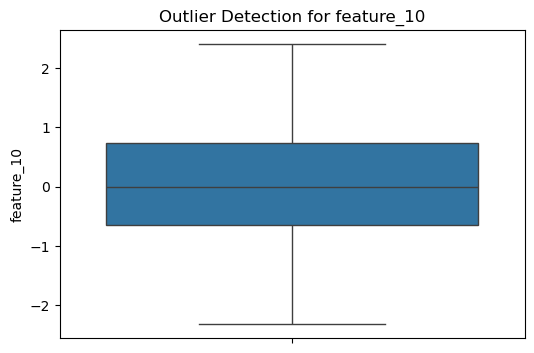

In [13]:
# Boxplots to detect outliers
for col in X_train.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(X_train[col])
    plt.title(f"Outlier Detection for {col}")
    plt.show()